In [1]:
from library.objective_function import *
from library.optimiser import *
from library.post_analysis import *
from library.experiments import *
%matplotlib inline
SEED = 12237

In [28]:
def setup_compsite_cma(inner_opt):
    # One experiment: setup optimizer
    cma = cma_es()
    optmizerParas = {
             'x0': np.zeros((2,)),
             'std': np.ones((2,)) * 30, 
             'tol': 1e-4, 
             'adjust_func': inner_opt, 
             'record': False, 
             'verbose': False}
    cma.set_parameters(optmizerParas)
    return cma

def do_multiple_exps_on_ackley(optimizer ,seed):
    
    np.random.seed(seed)

    # init multiple experiments
    exps = multiple_experiment()

    # init and setup one experiment
    exp = single_experiment()

    # One experiment: setup objective function
    ak = ackley()
    exp.set_objective(ak)

    # One experiment: setup optimizer

    exp.set_optimizer(optimizer)

    # Multiple experiment: setup one expreiment
    exps.set_single_exp(exp)

    # Multiple experiments: setup sample zone of multiple experiments
    zoneParas = {'origin': np.array([0,0]),
                 'edge': np.array([500, 500]),
                 'step': 20,
                 'size': 10,
                 'sym': True}
    exps.set_sample_zone(zoneParas)
    data = exps.do()
    
    num = zoneParas['edge'][0] / zoneParas['step']
    num = (num + 1) * num / 2
    print("\navg probility of converge: ", data['res'].sum() / num)
    print("avg func value: ", data['cost'].sum() / num)
    print("avg evals per exp: ", data['evals'].sum() / num)
    print("\n")
    
    return exps.analyser

# Original Ackley + Original CMA

In [29]:
cma = setup_compsite_cma(do_nothing())
%time ana = do_multiple_exps_on_ackley(cma, SEED)

complete: 1 / 325 
complete: 3 / 325 
complete: 6 / 325 
complete: 10 / 325 
complete: 15 / 325 
complete: 21 / 325 
complete: 28 / 325 
complete: 36 / 325 


/Users/huajian/Non-convex/library/optimiser.py:166: RuntimeWarning:

invalid value encountered in sqrt

/Users/huajian/miniconda3/envs/ada/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce

/Users/huajian/Non-convex/library/optimiser.py:60: RuntimeWarning:

invalid value encountered in less

/Users/huajian/Non-convex/library/optimiser.py:63: RuntimeWarning:

invalid value encountered in less



diverge, raise LinAlgError!
complete: 45 / 325 
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
complete: 55 / 325 
complete: 66 / 325 
complete: 78 / 325 
complete: 91 / 325 
complete: 105 / 325 
diverge, raise LinAlgError!
complete: 120 / 325 
diverge, raise LinAlgError!
diverge, raise LinAlgError!
complete: 136 / 325 
diverge, raise LinAlgError!
diverge, raise LinAlgError!
complete: 153 / 325 
diverge, raise LinAlgError!
diverge, raise LinAlgError!
complete: 171 / 325 
diverge, raise LinAlgError!
complete: 190 / 325 
diverge, raise LinAlgError!
complete: 210 / 325 
diverge, raise LinAlgError!
diverge, raise LinAlgError!
complete: 231 / 325 
diverge, raise LinAlgError!
complete: 253 / 325 
diverge, raise LinAlgError!
complete: 276 / 325 
complete: 300 / 325 
diverge, raise LinAlgError!
complete: 325 / 325 

avg probility of converge:  0.04615384615384615
avg func value:  19.572623242502182
avg evals per exp:  1988.5883076923076


CPU times: user 8m

In [30]:
1988 / 533 / 3250

0.0011476403521431663

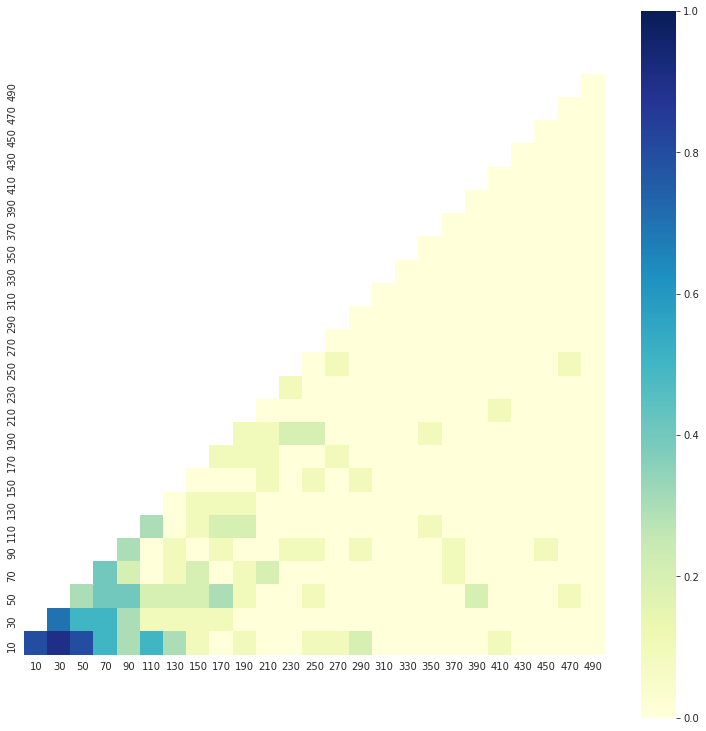

In [32]:
# start with random seed 2391
ana.plot_hotmap_prob()

# Original Ackley + CMA-line search

In [26]:
cma = setup_compsite_cma(line_search(alpha=10, beta=0.1))
%time ana = do_multiple_exps_on_ackley(cma, SEED)

complete: 1 / 325 
complete: 3 / 325 
complete: 6 / 325 
complete: 10 / 325 
complete: 15 / 325 
complete: 21 / 325 
complete: 28 / 325 
complete: 36 / 325 
complete: 45 / 325 
complete: 55 / 325 
complete: 66 / 325 


/Users/huajian/Non-convex/library/optimiser.py:166: RuntimeWarning:

invalid value encountered in sqrt

/Users/huajian/miniconda3/envs/ada/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce

/Users/huajian/Non-convex/library/optimiser.py:60: RuntimeWarning:

invalid value encountered in less

/Users/huajian/Non-convex/library/optimiser.py:63: RuntimeWarning:

invalid value encountered in less



diverge, raise LinAlgError!
complete: 78 / 325 
complete: 91 / 325 
diverge, raise LinAlgError!
complete: 105 / 325 
diverge, raise LinAlgError!
complete: 120 / 325 
diverge, raise LinAlgError!
complete: 136 / 325 
diverge, raise LinAlgError!
complete: 153 / 325 
diverge, raise LinAlgError!
complete: 171 / 325 
complete: 190 / 325 
diverge, raise LinAlgError!
diverge, raise LinAlgError!
complete: 210 / 325 
complete: 231 / 325 
complete: 253 / 325 
diverge, raise LinAlgError!
complete: 276 / 325 
diverge, raise LinAlgError!
complete: 300 / 325 
diverge, raise LinAlgError!
complete: 325 / 325 

avg probility of converge:  0.5676923076923077
avg func value:  8.646422709506682
avg evals per exp:  22447.44153846154


CPU times: user 39min 37s, sys: 4.25 s, total: 39min 41s
Wall time: 39min 44s


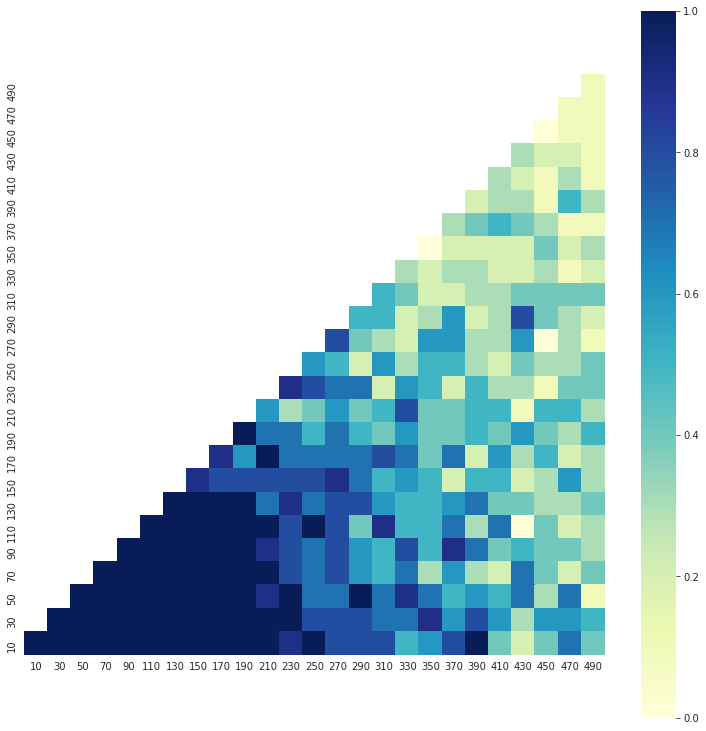

In [27]:
ana.plot_hotmap_prob()

### adam + original Ackley

In [5]:
ad = adam()
optmizerParas = {
         'x0': None,
         'alpha': 1.075330,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': False,
         'record': False }
ad.set_parameters(optmizerParas)
%time ana = do_multiple_exps_on_ackley(ad, SEED)

complete: 1 / 325 
complete: 3 / 325 
complete: 6 / 325 
complete: 10 / 325 
complete: 15 / 325 
complete: 21 / 325 
complete: 28 / 325 
complete: 36 / 325 
complete: 45 / 325 
complete: 55 / 325 
complete: 66 / 325 
complete: 78 / 325 
complete: 91 / 325 
complete: 105 / 325 
complete: 120 / 325 
complete: 136 / 325 
complete: 153 / 325 
complete: 171 / 325 
complete: 190 / 325 
complete: 210 / 325 
complete: 231 / 325 
complete: 253 / 325 
complete: 276 / 325 
complete: 300 / 325 
complete: 325 / 325 

avg probility of converge:  0.0
avg func value:  20.08322999159664
avg evals per exp:  189.112


CPU times: user 35.2 s, sys: 1.11 s, total: 36.4 s
Wall time: 36.2 s


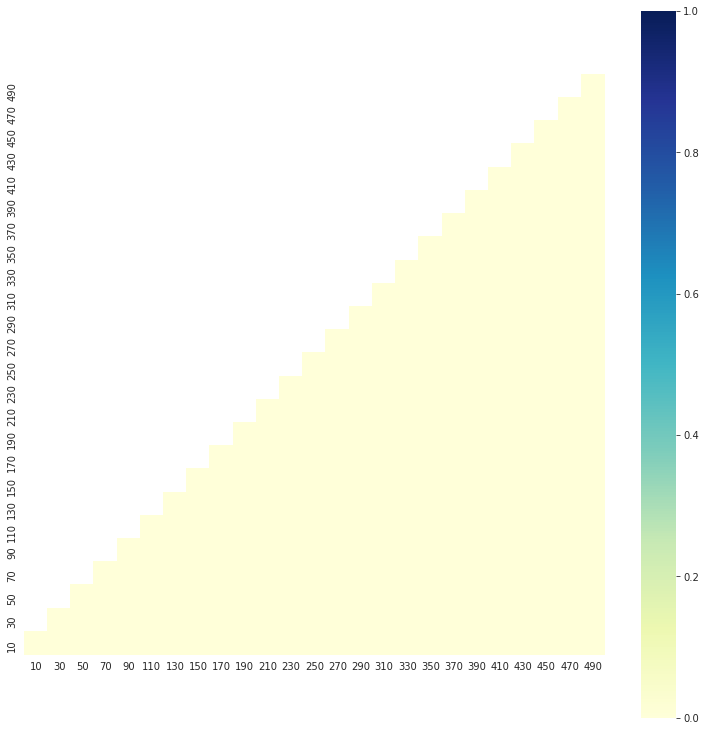

In [9]:
ana.plot_hotmap_prob()

# bukin + original CMA

In [77]:
def do_multiple_exps_on_bukin(optimizer, seed):
    np.random.seed(seed)

    # init multiple experiments
    mexps = multiple_experiment()

    # init and setup one experiment
    exp = single_experiment()
    # One experiment: setup objective function
    bk = bukin()
    exp.set_objective(bk)
    exp.set_optimizer(optimizer)

    # Multiple experiment: setup one expreiment
    mexps.set_single_exp(exp)
    # Multiple experiments: setup sample zone of multiple experiments
    zoneParas = {'origin': np.array([-15,-5]),
             'edge': np.array([30, 10]),
             'step': 1,
             'size': 10,
             'sym': False}
    mexps.set_sample_zone(zoneParas)

    data = mexps.do()
    
    print("avg probility of converge: ", data['res'].mean())
    print("avg func value: ", data['cost'].mean())
    print("avg evals per exp: ", data['evals'].mean())
    print("\n")
    return mexps.analyser

In [78]:
def setup_compsite_cma_bukin(inner_opt):
    # One experiment: setup optimizer
    cma = cma_es()
    optmizerParas = {
             'x0': np.zeros((2,)),
             'std': np.ones((2,)) * 0.3, 
             'tol': 1e-2, 
             'adjust_func': inner_opt, 
             'record': False, 
             'verbose': False}
    cma.set_parameters(optmizerParas)
    return cma

In [79]:
cma = setup_compsite_cma_bukin(do_nothing())
%time ana_cma = do_multiple_exps_on_bukin(cma, SEED)

complete: 10 / 300 
complete: 20 / 300 
complete: 30 / 300 
complete: 40 / 300 
complete: 50 / 300 
complete: 60 / 300 
complete: 70 / 300 
complete: 80 / 300 
complete: 90 / 300 
complete: 100 / 300 
complete: 110 / 300 
complete: 120 / 300 
complete: 130 / 300 
complete: 140 / 300 
complete: 150 / 300 
complete: 160 / 300 
complete: 170 / 300 
complete: 180 / 300 
complete: 190 / 300 
complete: 200 / 300 
complete: 210 / 300 
complete: 220 / 300 
complete: 230 / 300 
complete: 240 / 300 
complete: 250 / 300 
complete: 260 / 300 
complete: 270 / 300 
complete: 280 / 300 
complete: 290 / 300 
complete: 300 / 300 
avg probility of converge:  0.0006666666666666668
avg func value:  0.9985292005261615
avg evals per exp:  1589.258


CPU times: user 4min 52s, sys: 1.91 s, total: 4min 54s
Wall time: 5min 1s


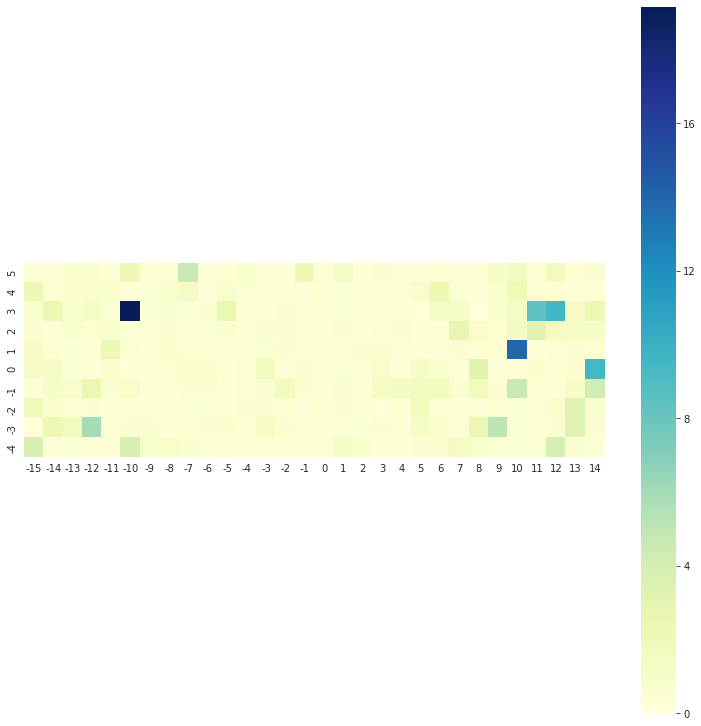

In [80]:
ana_cma.plot_hotmap_cost()

## cma line search + bukin

In [74]:
cma_ln = setup_compsite_cma_bukin(line_search(alpha=1e-5, beta=2e-5))
%time ana_ln = do_multiple_exps_on_bukin(cma_ln, SEED)

complete: 10 / 300 
complete: 20 / 300 
complete: 30 / 300 
complete: 40 / 300 
complete: 50 / 300 
complete: 60 / 300 
complete: 70 / 300 
complete: 80 / 300 
complete: 90 / 300 
complete: 100 / 300 
complete: 110 / 300 
complete: 120 / 300 
complete: 130 / 300 
complete: 140 / 300 
complete: 150 / 300 
complete: 160 / 300 
complete: 170 / 300 
complete: 180 / 300 
complete: 190 / 300 
complete: 200 / 300 
complete: 210 / 300 
complete: 220 / 300 
complete: 230 / 300 
complete: 240 / 300 
complete: 250 / 300 
complete: 260 / 300 
complete: 270 / 300 
complete: 280 / 300 
complete: 290 / 300 
complete: 300 / 300 
avg probility of converge:  0.8663333333333333
avg func value:  0.899872748653291
avg evals per exp:  157721.35366666666


CPU times: user 1h 55min 1s, sys: 1min 6s, total: 1h 56min 8s
Wall time: 2h 4min 38s


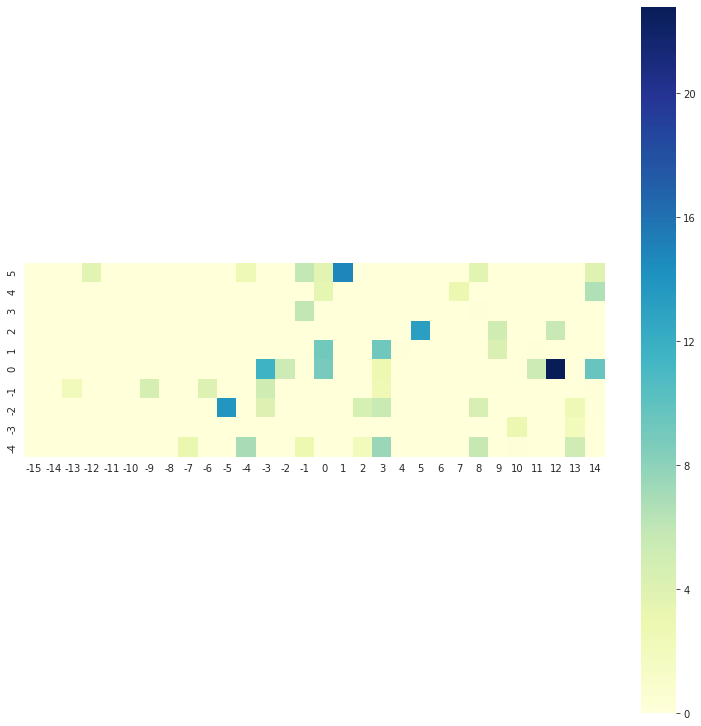

In [75]:
ana_ln.plot_hotmap_cost()

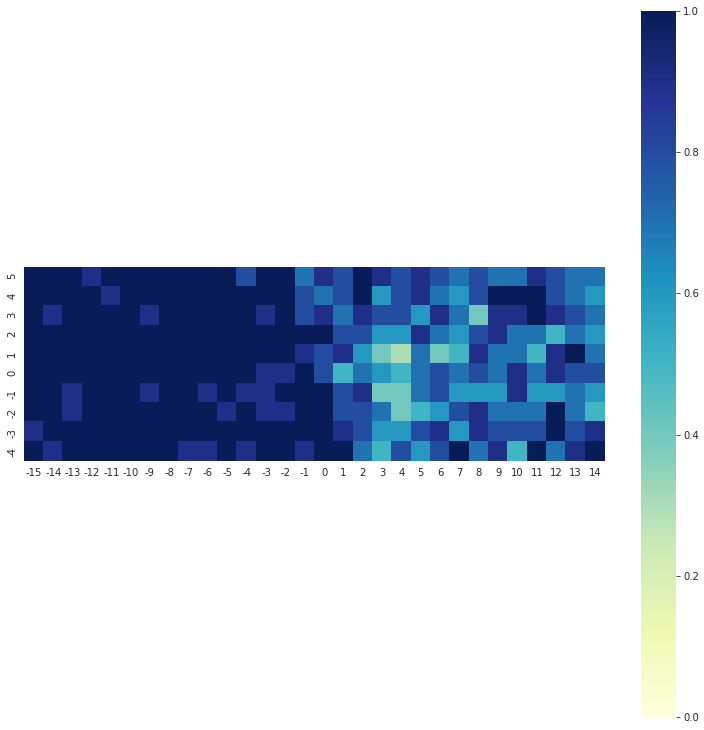

In [76]:
ana_ln.plot_hotmap_prob()

In [81]:
ad = adam()
optmizerParas = {
         'x0': None,
         'alpha': 1.075330,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': False,
         'record': False }
ad.set_parameters(optmizerParas)
%time ana_ada = do_multiple_exps_on_bukin(ad, SEED)

complete: 10 / 300 
complete: 20 / 300 
complete: 30 / 300 
complete: 40 / 300 
complete: 50 / 300 
complete: 60 / 300 
complete: 70 / 300 
complete: 80 / 300 
complete: 90 / 300 
complete: 100 / 300 
complete: 110 / 300 
complete: 120 / 300 
complete: 130 / 300 
complete: 140 / 300 
complete: 150 / 300 
complete: 160 / 300 
complete: 170 / 300 
complete: 180 / 300 
complete: 190 / 300 
complete: 200 / 300 
complete: 210 / 300 
complete: 220 / 300 
complete: 230 / 300 
complete: 240 / 300 
complete: 250 / 300 
complete: 260 / 300 
complete: 270 / 300 
complete: 280 / 300 
complete: 290 / 300 
complete: 300 / 300 
avg probility of converge:  0.0
avg func value:  137.3713185187927
avg evals per exp:  200.0


CPU times: user 18.7 s, sys: 633 ms, total: 19.3 s
Wall time: 19.4 s


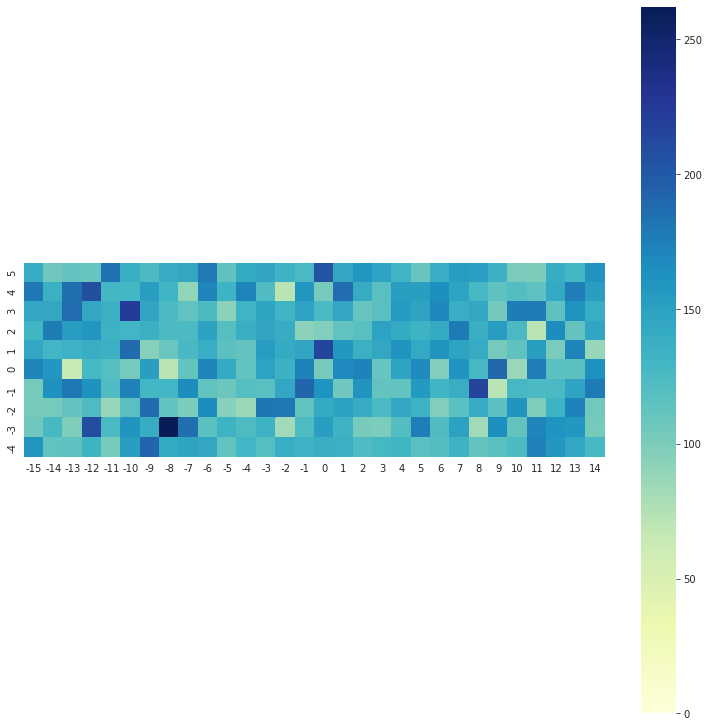

In [83]:
ana_ada.plot_hotmap_cost()

## summary on tunned ackley
| -- |original CMA | line search (default(medium) step size) - CMA  | round off - CMA|
| -- | -- | --| -- |
| #experiments| 100 experiments | 100 experiments | 100 experiments |
| total time| 3.9 s | 33.8 s |  2.8 s |
| evalutaions per exp | 0.6 k evals |  11.5 k evals | 0.3 k evals |
| *performance* | -- | -- | -- |
| probability |  0.75  | 0.8 | 0.25 |
| cost | 2.48 | 2.20 | 6.97 |